This part is to see how much people using different transport by month from 2018 to 2024

Columns in the DataFrame: Index(['_id', 'Year', 'Month', 'Month name', 'Metropolitan train',
       'Metropolitan tram', 'Metropolitan bus', 'Regional train',
       'Regional coach', 'Regional bus'],
      dtype='object')


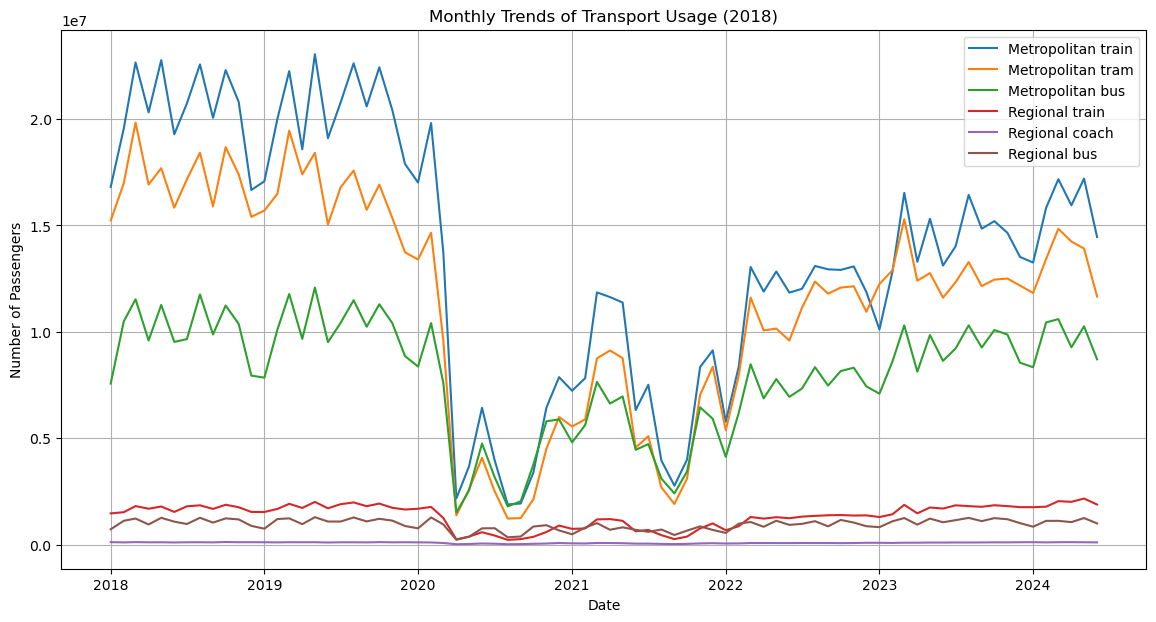

In [21]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Function to fetch data
def fetch_data(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')  # Decode bytes to string
        return pd.json_normalize(pd.read_json(StringIO(data))['result']['records'])

# Fetch data
url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=c0e59733-2a09-487d-920c-efff9c6aef56&limit=90'
df = fetch_data(url)

# Print the columns to check their names
print("Columns in the DataFrame:", df.columns)

# Convert necessary columns to numeric, handling None values
cols_to_convert = ['Metropolitan train', 'Metropolitan tram', 'Metropolitan bus', 
                   'Regional train', 'Regional coach', 'Regional bus']
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '', regex=False).fillna('0')  # Replace commas and fill None
    df[col] = df[col].astype(int)  # Convert to int

# Convert Year and Month to datetime for easier plotting
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'])

# Set Date as index
df.set_index('Date', inplace=True)

# Plotting the trends
plt.figure(figsize=(14, 7))

# Plot each transport type
for col in cols_to_convert:
    plt.plot(df.index, df[col], label=col)

plt.title('Monthly Trends of Transport Usage (2018)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

This part is to do compare between regional data and metropolitan data.

In [23]:
import urllib.request
import pandas as pd
from io import StringIO

# Function to fetch data
def fetch_data(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')
        return pd.json_normalize(pd.read_json(StringIO(data))['result']['records'])

# Fetching datasets
metro_url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=d92a2616-9b6b-42ca-960a-b225d82541ac&limit=100'
regional_url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=23714095-c6a1-4312-bb99-d92340d34d31&limit=100'

metro_df = fetch_data(metro_url)
regional_df = fetch_data(regional_url)

# Convert passenger columns to numeric
for df in [metro_df, regional_df]:
    df['Pax_annual'] = df['Pax_annual'].str.replace(',', '').astype(int)

# Identify regional vs metropolitan
metro_df['Type'] = 'Metropolitan'
regional_df['Type'] = 'Regional'

# Combine the datasets
combined_df = pd.concat([metro_df[['Stop_name', 'Pax_annual', 'Type']],
                          regional_df[['Stop_name', 'Pax_annual', 'Type']]], 
                         ignore_index=True)

# Analyze differences
summary = combined_df.groupby('Type')['Pax_annual'].describe()

print("Summary of Passenger Numbers:")
print(summary)

# Additional analysis can be done here, e.g., plotting or specific comparisons

Summary of Passenger Numbers:
              count           mean            std     min       25%       50%  \
Type                                                                            
Metropolitan  100.0  500588.000000  441177.884033  3250.0  192262.5  362800.0   
Regional       94.0  185042.553191  642517.830093   350.0    5550.0   35625.0   

                   75%        max  
Type                               
Metropolitan  666987.5  2073300.0  
Regional      128212.5  5925200.0  


This part is to see made year of vehicles registered in Victoria

In [25]:
import urllib.request
import pandas as pd
from io import StringIO

# Function to fetch data
def fetch_data(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')
        return pd.json_normalize(pd.read_json(StringIO(data))['result']['records'])

# Fetch the dataset
url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=177ce1eb-ab53-44b6-ab04-df90842475a3&limit=100'
df = fetch_data(url)

# Filter cars built before 2000
cars_before_2000 = df[df['NB_YEAR_MFC_VEH'] < 2000]

# Display the results
print(cars_before_2000)

    _id CD_MAKE_VEH1  CD_CLASS_VEH  NB_YEAR_MFC_VEH  POSTCODE CD_CL_FUEL_ENG  \
0     1       A AUST             2             1998      3431             D    
3     4       A BARF             2             1967      3302             D    
4     5       A BARF             2             1975      3352             D    
5     6       A BARF             2             1981      3414             D    
6     7       A BARF             2             1965      3517             P    
..  ...          ...           ...              ...       ...            ...   
95   96       A SID              2             1956      3139             P    
96   97       A SID              2             1926      3149             P    
97   98       A SID              2             1955      3149             P    
98   99       A SID              2             1958      3149             P    
99  100       A SID              2             1960      3149             P    

    TOTAL1  
0        1  
3        1  


In [27]:
import urllib.request
import pandas as pd
from io import StringIO

# Function to fetch data
def fetch_data(url):
    with urllib.request.urlopen(url) as response:
        data = response.read().decode('utf-8')
        return pd.json_normalize(pd.read_json(StringIO(data))['result']['records'])

# Fetch the dataset
url = 'https://discover.data.vic.gov.au/api/3/action/datastore_search?resource_id=177ce1eb-ab53-44b6-ab04-df90842475a3&limit=100'
df = fetch_data(url)

# Extract the decade from the manufacturing year
df['Decade'] = (df['NB_YEAR_MFC_VEH'] // 10) * 10

# Count vehicles per decade
decade_counts = df['Decade'].value_counts().sort_index()

# Calculate the percentage for each decade
total_vehicles = len(df)
decade_percentage = (decade_counts / total_vehicles) * 100

# Display the results
print(decade_percentage)

Decade
1900     2.0
1920     3.0
1930     1.0
1940     2.0
1950    18.0
1960     9.0
1970     4.0
1980    11.0
1990    15.0
2000    15.0
2010    18.0
2020     2.0
Name: count, dtype: float64
